<a href="https://colab.research.google.com/github/baibai25/patoyata-gacha/blob/main/patoyata_gacha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

## gacha ratio simulation
- SSR: 3%
- SR: 18%
- R: 79%

In [2]:
np.random.seed()

In [3]:
rare = ['SSR', 'SR', 'R']
proba = [0.03, 0.18, 0.79]
sample_size = 10000

In [4]:
test_result = np.random.choice(a=rare, size=sample_size, p=proba)

In [5]:
cnt = Counter(test_result)
print(cnt)
print(np.array(list(cnt.values())))
print(100 * np.array(list(cnt.values())) / sample_size)

Counter({'R': 7897, 'SR': 1808, 'SSR': 295})
[7897  295 1808]
[78.97  2.95 18.08]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


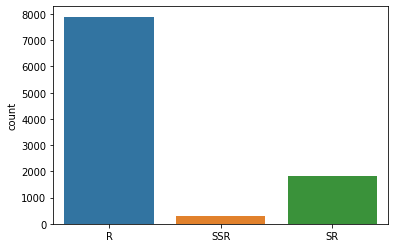

In [6]:
sns.countplot(test_result)

## dataset

In [7]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

In [8]:
gc = gspread.authorize(GoogleCredentials.get_application_default())
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nx47RQNXMtTrE3ntYsV9xtRsESGDmkO3pkWFbjKj3IM/edit#gid=0').sheet1

In [9]:
df = pd.DataFrame(worksheet.get_all_values())
df.columns = list(df.loc[0, :])
df.drop(0, inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

## キャラ一覧

In [10]:
df

,rare,name
0,SSR,Chris
1,SSR,Donnis
2,SR,Pato
3,SR,Yata
4,SR,MaC
5,SR,RINDOU
6,SR,ひつじちゃん
7,SR,Tommy
8,R,久我
9,R,久我弟


## gacha

In [11]:
def get_rare_result(rare, sample_size, proba):
  np.random.seed()
  return np.random.choice(a=rare, size=sample_size, p=proba) # TODO: add pickup proba

In [12]:
def get_items(rare_result, df):
  count = Counter(rare_result)
  
  result = pd.DataFrame([], columns=df.columns)
  for rare, count in count.items():
    result = pd.concat([result, df[df['rare'] == rare].sample(n=count, replace=True).reset_index()], axis=0)
  return result[['rare', 'name']]

In [13]:
def set_params(size):
  rare = ['SSR', 'SR', 'R']
  proba = [0.03, 0.18, 0.79]
  sample_size = size
  return rare, proba, sample_size

In [14]:
def execute(size):
  rare, proba, sample_size =  set_params(size)
  rare_result = get_rare_result(rare, sample_size, proba)
  return get_items(rare_result, df)

In [15]:
execute(10)

,rare,name
0,R,久我のカブトムシ
1,R,久我妹
2,R,久我妹
3,R,ほうれん草とベーコンのクリームパスタ
4,R,久我のカブトムシ
5,R,久我妹
6,R,久我
7,R,久我弟
0,SR,Tommy
1,SR,MaC
